# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [9]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.


In [10]:
import os

def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

# Specify the local path to the dataset
dataset_path = r'C:\Users\chadhrr\OneDrive - OTPP\Desktop\DSI\deep_learning\02_activities\assignments\downloaded_books\shakespeare.txt'

# Load chosen dataset. NOTE: If running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
text = load_dataset(dataset_path, fraction=0.1)

print(text[:1000])  # Print the first 1000 characters of the loaded text



The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this electronic version
    the footnotes 

# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [11]:
# Your code here

# Load the dataset
dataset_path = r'C:\Users\chadhrr\OneDrive - OTPP\Desktop\DSI\deep_learning\02_activities\assignments\downloaded_books\shakespeare.txt'
text = load_dataset(dataset_path, fraction=1.0)

# Print the first 1000 characters
print("First 1000 characters of the dataset:")
print(text[:1000])

# Report the dataset's size
dataset_size = len(text)
print(f"\nDataset size: {dataset_size} characters")

# Count the number of unique characters
unique_characters = set(text)
num_unique_characters = len(unique_characters)
print(f"Number of unique characters: {num_unique_characters}")

# Display the unique characters
print("\nUnique characters in the dataset:")
print(unique_characters)


First 1000 characters of the dataset:
The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this

## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [12]:
from keras.preprocessing.text import Tokenizer

# Your code here
VOCAB_SIZE = None
OOV_TOKEN = None

tokenizer = None

If everything worked, the following line should show you the first 10 words in the vocabulary:

In [13]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)


Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it.


In [14]:
import os
from keras.preprocessing.text import Tokenizer

# Load the dataset
dataset_path = r'C:\Users\chadhrr\OneDrive - OTPP\Desktop\DSI\deep_learning\02_activities\assignments\downloaded_books\shakespeare.txt'
with open(dataset_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Convert the text to lowercase
text = text.lower()

# Define the vocabulary size and OOV token
VOCAB_SIZE = 10000  # You can adjust this based on your dataset
OOV_TOKEN = "<OOV>"

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Fit the tokenizer on the text
tokenizer.fit_on_texts([text])

# Convert the text to a sequence of numbers
sequences = tokenizer.texts_to_sequences([text])

# Print the first 10 words in the vocabulary
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it.")


[('<OOV>', 1), ('the', 2), ('and', 3), ('of', 4), ('to', 5), ('in', 6), ('i', 7), ('a', 8), ('you', 9), ('that', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [15]:
import numpy as np

# Set the sequence length
SEQ_LENGTH = 50  # You can adjust this based on your dataset and requirements

# Convert the text to a list of sequences of numbers
sequences = tokenizer.texts_to_sequences([text])[0]

# Generate the training sequences
X = []
y = []

for i in range(0, len(sequences) - SEQ_LENGTH):
    X.append(sequences[i:i + SEQ_LENGTH])
    y.append(sequences[i + SEQ_LENGTH])

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of X and y to verify
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (1526748, 50)
y shape: (1526748,)


Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [16]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [   2  138  130  784    4  267   28  666  358   21  784   13   17    2
  296    4 1369 3383   43   41  818    3   14  583   41 3598 2443    9
   99  411   16  142   16  171   36  341  296   16  351    2  376    4
    2  138  130  558 2230   14   21  784]
Target: 36
Translated back to words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook'] -> or


And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Set a manageable vocabulary size
VOCAB_SIZE = 10000  # You can adjust this based on your dataset and requirements
OOV_TOKEN = '<OOV>'

# Initialize the tokenizer with the new vocabulary size and OOV token
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts([text])

# Convert the text to sequences
sequences = tokenizer.texts_to_sequences([text])[0]

# Generate training sequences
SEQ_LENGTH = 50  # Adjust based on your requirements
X = []
y = []

for i in range(0, len(sequences) - SEQ_LENGTH):
    X.append(sequences[i:i + SEQ_LENGTH])
    y.append(sequences[i + SEQ_LENGTH])

X = np.array(X)
y = np.array(y)

# Drop examples where the target is the OOV token
OOV_INDEX = tokenizer.word_index[OOV_TOKEN]
mask = y != OOV_INDEX
X = X[mask]
y = y[mask]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

# Print the first sequence and its target
if len(X_train) > 0 and len(y_train) > 0:
    print(f'Sequence: {X_train[0]}')
    print(f'Target: {y_train[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X_train[0]]} -> {tokenizer.index_word[y_train[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


X_train shape: (1120109, 50)
y_train shape: (1120109,)
Sequence: [  84  153  154    1   77   68  214   71    1   63 4169    5  923  828
   85   12   17    5 4068   24 1214    7 3309   24    7  220   61   77
    7 7395   68    7  916   71   63 4937    1   76   84 4140   78   85
   12  216    6   24 5030 3801  214  778]
Target: 76
Translated back to words: ['q₃', 'q₄', 'q₅', '<OOV>', 'f₁', 'f₂', 'q₆', 'f₃', '<OOV>', 'f₄', '214', 'to', 'drink', 'deep', 'q₁', 'ff', 'for', 'to', 'drinke', 'qq', '215', 'i', 'prethee', 'qq', 'i', 'pray', 'thee', 'f₁', 'i', 'prythee', 'f₂', 'i', 'prithee', 'f₃', 'f₄', 'student', '<OOV>', 'q₂', 'q₃', '216', 'see', 'q₁', 'ff', 'omitted', 'in', 'qq', '217', "follow'd", 'q₆', 'followed'] -> q₂


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the vocabulary size and embedding dimension
VOCAB_SIZE = 10000  # This should match the value used during tokenization
EMBEDDING_DIM = 100  # You can adjust this based on your requirements
SEQ_LENGTH = 50  # This should match the sequence length used during data preparation

# Define the model architecture
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=SEQ_LENGTH),
    LSTM(128, return_sequences=False),  # You can adjust the number of units
    Dense(VOCAB_SIZE, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 10000)             1290000   
                                                                 
Total params: 2,407,248
Trainable params: 2,407,248
Non-trainable params: 0
_________________________________________________________________


## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

To compile the RNN model, we'll use `categorical_crossentropy` as the loss function. This loss function is well-suited for multi-class classification problems where each sample belongs to one of several classes. In this task, predicting the next token in a sequence involves mapping each token to a unique class (word in the vocabulary). The `categorical_crossentropy` loss function measures how well the predicted probability distribution aligns with the true distribution, which is represented as a one-hot encoded target. It is commonly used in text generation and sequence prediction tasks due to its effectiveness in handling such scenarios.

For the optimizer, we will use `Adam`, a popular choice for training neural networks. Adam combines the benefits of two other optimizers, AdaGrad and RMSProp, by employing adaptive learning rates and momentum-based updates. This allows it to efficiently manage sparse gradients and dynamically adjust the learning rate throughout training. Adam is known for its strong performance across a variety of problems, including text generation tasks, making it a suitable choice for this model.

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the vocabulary size and embedding dimension
VOCAB_SIZE = 10000  # This should match the value used during tokenization
EMBEDDING_DIM = 100  # You can adjust this based on your requirements
SEQ_LENGTH = 50  # This should match the sequence length used during data preparation

# Define the model architecture
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=SEQ_LENGTH),
    LSTM(128, return_sequences=False),  # You can adjust the number of units
    Dense(VOCAB_SIZE, activation='softmax')
])

# Print the model summary
model.summary()
# Your code here
from keras.optimizers import Adam

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer=Adam(),  # Optimizer with adaptive learning rate
    metrics=['accuracy']  # Track accuracy during training
)





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 10000)             1290000   
                                                                 
Total params: 2,407,248
Trainable params: 2,407,248
Non-trainable params: 0
_________________________________________________________________


## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [20]:
from keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if OOV_TOKEN in tokenizer.word_index:
        mask = y != tokenizer.word_index[OOV_TOKEN]
        X = X[mask]
        y = y[mask]

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')

    # Compile the model with sparse categorical crossentropy
    model.compile(
        optimizer='adam',
        loss=SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(X_train, y_train, 
                        epochs=5, 
                        batch_size=128, 
                        validation_data=(X_val, y_val))

    # Display the training history
    print(history.history)
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")


X_train shape: (1120109, 50)
y_train shape: (1120109,)
Epoch 1/5


c:\Users\chadhrr\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8751/8751 [==============================] - 4212s 481ms/step - loss: 6.1480 - accuracy: 0.1001 - val_loss: 5.6369 - val_accuracy: 0.1363
Epoch 2/5
8751/8751 [==============================] - 2767s 316ms/step - loss: 5.4114 - accuracy: 0.1525 - val_loss: 5.3456 - val_accuracy: 0.1633
Epoch 3/5
8751/8751 [==============================] - 2834s 324ms/step - loss: 5.1174 - accuracy: 0.1756 - val_loss: 5.2237 - val_accuracy: 0.1764
Epoch 4/5
8751/8751 [==============================] - 2675s 306ms/step - loss: 4.9256 - accuracy: 0.1898 - val_loss: 5.1643 - val_accuracy: 0.1850
Epoch 5/5
8751/8751 [==============================] - 3133s 358ms/step - loss: 4.7797 - accuracy: 0.2006 - val_loss: 5.1406 - val_accuracy: 0.1897
{'loss': [6.148021221160889, 5.411351680755615, 5.117430686950684, 4.92564582824707, 4.779704570770264], 'accuracy': [0.10008668899536133, 0.15247979760169983, 0.17560969293117523, 0.18978242576122284, 0.2005581557750702], 'val_loss': [5.6368842124938965, 5.345641613006

Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

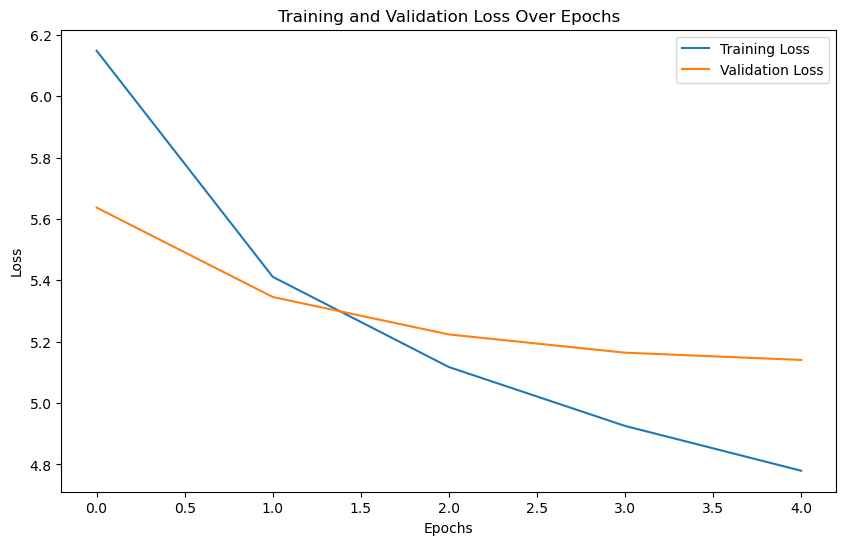

In [21]:
import matplotlib.pyplot as plt

# Your code here
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    This helper function adds a bit of randomness in what word we predict.
    """
    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(yhat.shape[1]), p=yhat.ravel())

    return yhat

def generate_text(model, tokenizer, seed_text, max_sequence_len):
    """
    Generate new text using the trained model.
    """
    # Tokenize the seed text
    seed_text_tokens = tokenizer.texts_to_sequences([seed_text])[0]
    generated_text = seed_text

    for _ in range(max_sequence_len):
        # Pad the sequence to the same length as the training sequences
        sequence = pad_sequences([seed_text_tokens], maxlen=max_sequence_len, padding='pre')

        # Predict the next token
        predicted_word_index = get_predicted_word(model, sequence)

        # Convert predicted token to word
        predicted_word = tokenizer.index_word.get(predicted_word_index, '')

        if not predicted_word:
            break

        # Append the predicted word to the seed text
        generated_text += ' ' + predicted_word

        # Add the predicted token to the sequence and remove the first token
        seed_text_tokens.append(predicted_word_index)
        seed_text_tokens = seed_text_tokens[1:]

        # Print the generated word (optional, for real-time visualization)
        print(predicted_word, end=' ')

    return generated_text

# Example usage
# generated_text = generate_text(model, tokenizer, seed_text='Once upon a time', max_sequence_len=50)
# print("\nGenerated Text:\n", generated_text)


In [23]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

80 and cannot be found out gives stronger fellows and leaves was bound your vassal the tragic watchmen we are bound to his looks for thither to the blood 63 and we deadly wall 4020 22 125 elements and vice from us is much for production towards thy looks quite 

'hamlet 80 and cannot be found out gives stronger fellows and leaves was bound your vassal the tragic watchmen we are bound to his looks for thither to the blood 63 and we deadly wall 4020 22 125 elements and vice from us is much for production towards thy looks quite'


It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small. 

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras. 
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [24]:
import numpy as np

# Path to your GloVe file
glove_file_path = r'C:\Users\chadhrr\OneDrive - OTPP\Desktop\DSI\deep_learning\02_activities\assignments\glove.6B\glove.6B.300d.txt'

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_embeddings = load_glove_embeddings(glove_file_path)


In [45]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 300)           18045000  
                                                                 
 lstm_2 (LSTM)               (None, 50, 150)           270600    
                                                                 
 dropout (Dropout)           (None, 50, 150)           0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 60150)             9082650   
                                                                 
Total params: 27,578,850
Trainable params: 9,533,850
N

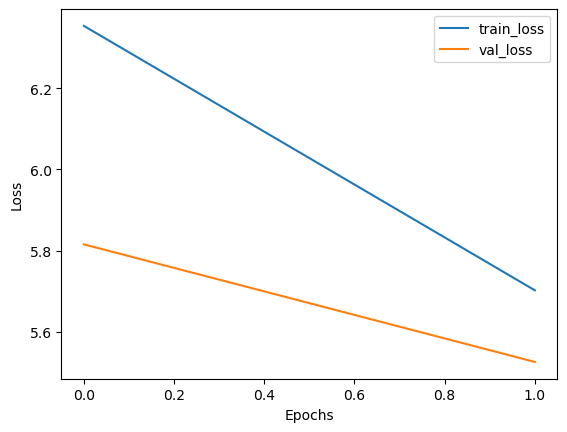

ValueError: in user code:

    File "c:\Users\chadhrr\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\chadhrr\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\chadhrr\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\chadhrr\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\chadhrr\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\chadhrr\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 50), found shape=(None, 49)


In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Define constants
VOCAB_SIZE = len(tokenizer.word_index) + 1  # Add 1 for padding token
embedding_dim = 300  # GloVe embedding dimension
MAX_SEQUENCE_LEN = 50  # Update this to match your data's sequence length

# Load GloVe embeddings
glove_file_path = 'C:\\Users\\chadhrr\\OneDrive - OTPP\\Desktop\\DSI\\deep_learning\\02_activities\\assignments\\glove.6B\\glove.6B.300d.txt'
glove_embeddings = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Create an embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < VOCAB_SIZE:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the model with pre-trained GloVe embeddings
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=MAX_SEQUENCE_LEN, trainable=False),
    LSTM(150, return_sequences=True),
    Dropout(0.2),
    LSTM(150),
    Dropout(0.2),
    Dense(VOCAB_SIZE, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Pad sequences to match MAX_SEQUENCE_LEN
X_train_padded = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LEN, padding='post')
X_val_padded = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LEN, padding='post')

# Train the model
history = model.fit(X_train_padded, y_train, 
                    epochs=2,  # Increase the number of epochs for better training
                    batch_size=128, 
                    validation_data=(X_val_padded, y_val))

# Plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate text
def generate_text(model, tokenizer, seed_text, max_sequence_len, num_words_to_generate=50):
    for _ in range(num_words_to_generate):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted_probs, axis=1)
        output_word = tokenizer.index_word[predicted[0]]
        seed_text += " " + output_word
    return seed_text

# Example usage
seed_text = "Once upon a time"
generated_text = generate_text(model, tokenizer, seed_text, MAX_SEQUENCE_LEN)
print(generated_text)


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.